# Project 

<b>This Notebook checks the correlation between the stock prices of the various sectors with the college student's enrollment in those sectors. If the stock prices of a particular sector is doing really well, should we expect the college student's enrollment in those sectors to be high. Is there some sort of relationship with these two? Or is it completely random for the college students to enroll in a particular sector irrespective of its performance in the stock market? By the end of this notebook we will be able to conclude for years from 2009-2018 if there exists a relationship between these two things.</b>


## Preparation Steps

In [5]:
"""
Follow these steps to install Packages if you dont already have them:
    
1. To set current environment to download package   #You can skip this step if you only use (root) as your environment
    conda activate <Environment Name>

2. To Install Packages in Anaconda Prompt:          #make sure you run Anaconda Command Prompt as an Administrator
    $Conda python -m pip install <package>          #Type This in conda cmd prompt to install any packages needed

    These are needed:
    $Conda python -m pip install yahoo_fin
    $Conda python -m pip install requests_html
    
   Also Include the below mentioned files in yout local, these are the necessary files to run the program
   DegreeCodes2.csv
   Sector_ETFS.csv
"""

# Import all necessary python packages
import errno 
import csv
from yahoo_fin import stock_info as si 

In [14]:
"""
Reference Sites:

#Subjects Available
https://www2.census.gov/programs-surveys/acs/tech_docs/pums/subjects_in_pums/2018_5yr_PUMS_Subjects.pdf?#


#Main Overview Page
https://www.census.gov/programs-surveys/acs/data/pums.html


#Data Request Page
https://data.census.gov/mdat/#/


#Census.gov API reference:
https://www.census.gov/data/developers/guidance/api-user-guide.Overview.html


#Tutorial on how to make api requests:
https://www.dataquest.io/blog/python-api-tutorial/
"""


import requests 
import pandas as pd
import numpy as np 
import pickle 
import os

#Select your own Working Directory
workingDirectory = r"C:\\Users\\arjun\\Documents\\Desktop\\Rashmi\\Courses\\Machine Learning\\Project"    
os.chdir(workingDirectory) 
getcwd() 

'C:\\Users\\arjun\\Documents\\Desktop\\Rashmi\\Courses\\Machine Learning\\Project'

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.patches as mpatches 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR 
from sklearn import metrics

In [9]:
#-------------Set working Directory
import os
from os import chdir, getcwd
workingDirectory = r"F:\DataScience\NJIT\CS675-Machine Learning\Project1\Jupyter"   #<----Enter your working folder here
chdir(workingDirectory) 
getcwd() 
 

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'F:\\DataScience\\NJIT\\CS675-Machine Learning\\Project1\\Jupyter'

#### make sure you activate the conda environment you wish to have all packeges installed in and install the packages by using the below listed lines of codes in anaconda prompt. It is also important to run Anaconda Command Prompt as an Administrator

<br> conda activate CS675-S20 </br>
<br> python -m pip install yahoo_fin </br>
<br> python -m pip install requests_html </br>

<b> In this NoteBook we have used Pickles </b>

<br> What are Pickles?</br>
<br>
It is a type of data file used in python for saving python objects. it is a helper function to save objects. Since the dataset is huge once we download the data and save it in a pickle, we don't have to download it again, because the data will get stored in our local folder as a pickle file. </br>

In [17]:
#Configure Working Directory/Storage locations
pd.set_option('display.max_columns',None) 

#Select your own Folder Path and Working Directory
FolderPath = r'C:\Users\arjun\Documents\Desktop\Rashmi\Courses\Machine Learning\Project'
#C:\Users\arjun\Documents\Desktop\Rashmi\Courses\Machine Learning\Project
working_directory = r'C:\Users\arjun\Documents\Desktop\Rashmi\Courses\Machine Learning\Project'

#Name the 'storage folder' where data will be stored
StorageFolder = 'Storage'     

#File Where Sector ETF tickers are stored, Make sure this is stored in Working Directory
ReferenceTickers = 'Sector_ETFS.csv'         

#Sets the Current Working Directory.
#os.chdir(working_directory)                                                  

In [18]:
#Creates Storage Folder in working directory
try: 
    os.makedirs(FolderPath+'\\'+StorageFolder)
except OSError:
    if OSError.errno != errno.EEXIST:
        print("'"+StorageFolder[1:]+"'",' Folder already exists in ',"'"+FolderPath+"'")   


## Getting the price history of stocks of various sectors

In [19]:

with open(ReferenceTickers) as csv_file:
    #Create a reader object
    csv_reader = csv.reader(csv_file, delimiter = ',')                              
    for LineCount, row in enumerate(csv_reader):
        
        #First row of CSV file Should be column names
        if LineCount == 0:                                                          
            print(f'Column Names are:\n{",".join(row)}')
        else:
            try:
                #Last row of csv file is empty, checks if row is empty
                if len(row) != 0:                                                   
                    Abbreviation = row[1]
                    
                    #strip removes white spaces
                    Ticker = row[2].strip()
                    
                    #Actually get data
                    df = si.get_data(Ticker)
                    
                    #store dataframe into a dictionary                                        
                    data[Abbreviation] = df     
                    
                    #Set File path & name                            
                    FilePath = '{0}\\{1}.csv'.format(StorageFolder, Abbreviation)  
                    
                    #Store Ticker as a CSV file
                    #Read data into a csv & format data
                    df.to_csv(path_or_buf = FilePath,sep = ',',                     
                              index = True, index_label = 'date',
                              columns = df.columns[:-1], header = df.columns[:-1],
                              float_format = '%.2f')
                    
                    print('Completed:\t',Abbreviation, '\tTicker: ',Ticker)
                    
                #Does nothing for last row (which is empty)
                else:                                                        
                    break
            except:
                print('Error in:\t',row[1],'\tTicker: ',row[2].strip())
    print('All Done!')

Column Names are:
Sector,Abb,Ticker
Error in:	 Tech 	Ticker:  XLK
Error in:	 CS 	Ticker:  XLP
Error in:	 HC 	Ticker:  XLV
Error in:	 Util 	Ticker:  XLU
Error in:	 Comm 	Ticker:  XLC
Error in:	 RE 	Ticker:  XLRE
Error in:	 CD 	Ticker:  XLY
Error in:	 Mat 	Ticker:  XLB
Error in:	 Ind 	Ticker:  XLI
Error in:	 Fin 	Ticker:  XLF
Error in:	 Enr 	Ticker:  XLE
All Done!


## Plot the Stock History


In [21]:
#code for drawing graphs :   
ticker_symbols = [ 'XLK', 'XLP', 'XLV' , 'XLU' , 'XLC', 'XLRE', 'XLY', 'XLB' ,'XLI' , 'XLF' ,'XLE']
  
for ticker in ticker_symbols:
    df = si.get_data(ticker, start_date = '01/01/2009', end_date ='12/31/2018', interval='1mo')      
    fig, ax = plt.subplots()
    ax.plot(df.index.values,df['close'])
    ax.set_title( ticker + ' Stock price plot')
    plt.xlabel('year')
    plt.ylabel('closing stock price') 

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

## Statistics of stockdata
Obtaining opening and closing price difference, percentage change and standard deviation of the stockdata

In [22]:
#This function takes year & month as input and retuns last day of Febuary month.
def getLastDayOfFebMonth(year):
            if year % 4 == 0:
                return 29
            else:
                return 28

#This function takes month as input and returns last day of month          
def getLastDayOfMonth(month):
    month_lastDay_dict={}
    month_lastDay_dict[1]=31
    month_lastDay_dict[3]=31
    month_lastDay_dict[4]=30
    month_lastDay_dict[5]=31
    month_lastDay_dict[6]=30
    month_lastDay_dict[7]=31
    month_lastDay_dict[8]=31
    month_lastDay_dict[9]=30
    month_lastDay_dict[10]=31
    month_lastDay_dict[11]=30
    month_lastDay_dict[12]=31
    return month_lastDay_dict[month]

In [23]:
#This function takes mode as input (year or month) and returns data dictionary.    
def getEtfData(mode):
    ticker_symbols = [ 'XLK', 'XLP', 'XLV' , 'XLU' , 'XLC', 'XLRE', 'XLY', 'XLB' ,'XLI' , 'XLF' ,'XLE','SPY']
    data_dict = {}
    result_dict = {}
    if (mode == 'year'):
        for ticker in ticker_symbols:
            year_dict = {}
            for year in range(2008 , 2019):
                try:
                    df = si.get_data(ticker , start_date = '01/01/'+ str(year), end_date ='12/31/'+str(year) )
                except Exception as error:
                    print("exception " + ticker + " in year " + str(year))
                    continue
                openingPrice = df['open'][0]
                rowSize = df['close'].size
                closingPrice = df['close'][rowSize-1]
                priceDiff = closingPrice - openingPrice
                percentChange = (priceDiff/openingPrice)*100
                sd = np.std(df['close'])
                yearStats ={}
                yearStats['openingPrice'] = openingPrice
                yearStats['closingPrice'] = closingPrice                
                yearStats['priceDiff'] = priceDiff                
                yearStats['percentChange'] = percentChange
                yearStats['sd'] = sd
                year_dict[year] = yearStats
                data_dict[ticker] = year_dict
    if (mode == 'month'):
        for ticker in ticker_symbols:
            year_dict = {}
            for year in range(2008 , 2019):
                for month in range(1 , 13):
                    try:
                        if(month == 2):
                            endDate = getLastDayOfFebMonth(year)
                        else:
                            endDate = getLastDayOfMonth(month) 
                            df = si.get_data(ticker, start_date = str(month) + '/01/' + str(year), end_date =str(month) + '/'+ str(endDate) +'/' + str(year))
                    except Exception as error:
                        print("exception " + ticker + " in year " + str(year) + " month " + str(month))
                        continue
                        openingPrice = df['open'][0]
                        rowSize = df['close'].size
                        closingPrice = df['close'][rowSize-1]
                        priceDiff = closingPrice - openingPrice
                        percentChange = (priceDiff/openingPrice)*100
                        sd = np.std(df['close'])
                        monthStats ={}
                        monthStats['openingPrice'] = openingPrice
                        monthStats['closingPrice'] = closingPrice 
                        monthStats['priceDiff'] = priceDiff                
                        monthStats['percentChange'] = percentChange
                        monthStats['sd'] = sd
                        year_dict[str(year)+'-'+str(month)] = monthStats
                        data_dict[ticker] = year_dict    
    return data_dict

In [24]:
def GetDataFrames(data_dict):
    df_dict = {}
    for ticker,ETFdata in data_dict.items():
        df = pd.DataFrame.from_dict(ETFdata, orient = 'index')
        df['growth'] = df['closingPrice'] / df.iloc[0,0]
        df_dict[ticker] = df
    return df_dict

In [25]:
def runPlot(result_dict,Type):
    Sectors = {  'XLK': 'Tech',
             'XLP': 'ConStaple',
             'XLV': 'HealthCare',
             'XLU': 'Utils',
             'XLC': 'Commun',
             'XLRE': 'RealEstate',
             'XLY': 'ConsDisc',
             'XLB': 'Materials',
             'XLI': 'Industrial',
             'XLF': 'Financials',
             'XLE': 'Energy',
             'SPY': 'S&P'}
    
    ROWS = list(result_dict.values())[0].shape[1]
    COLS = len(result_dict.keys())
    fig, axes = plt.subplots(nrows = ROWS, ncols = COLS,sharex = 'col',sharey = 'row')
    ylimits = {}
    Date_Spacing = 12 if Type == 'month' else 2
    
    for plot_column, item in enumerate(result_dict.items()):    
        ticker, df = item

        for plot_row, df_col in enumerate(df):
            if plot_row not in ylimits.keys():
                ylimits[plot_row] = {'min':df.loc[:,df_col].min(),'max':df.loc[:,df_col].max()}
            
            ax = axes[plot_row,plot_column]

            ax.plot(df.index,df.loc[:,df_col],'ob-',markersize = 0.5, linewidth = 0.33)
            ax.get_lines()[0].set_color('tab:blue')
            
            if df.loc[:,df_col].min() < ylimits[plot_row]['min']:
                ylimits[plot_row]['min'] = df.loc[:,df_col].min()
            if df.loc[:,df_col].max() > ylimits[plot_row]['max']:
                ylimits[plot_row]['max'] = df.loc[:,df_col].max()
            
            
            if plot_row == 0: #First Row
                ax.set_title(Sectors[ticker])
            if plot_column == 0: #First Column
                ax.set_ylabel(df_col)
            
            LastRow = df.shape[1] -1
            if plot_row == LastRow:
                dateSpacing = df.index[::Date_Spacing].tolist()
                dateLabels = [str(year) for year in dateSpacing]
                LastDate = df.index[-1]
                if LastDate not in dateSpacing:
                    dateSpacing.append(LastDate)
                    dateLabels.append(str(LastDate))
                ax.set(xticks = dateSpacing, xticklabels = dateLabels)
                ax.tick_params(axis = 'x', labelrotation = 60, labelsize = 6)            

    for row,row_axes in enumerate(axes):  #Set Y-axis limits
        for ax in row_axes:
            Rang = (ylimits[row]['max']-ylimits[row]['min'])*0.1
            ax.set_ybound(lower = ylimits[row]['min']-Rang, upper = ylimits[row]['max']+Rang)

    
    fig.suptitle('{} Data For Sector ETFs'.format(Type))
    return fig,axes


In [26]:

def Pickler(Item2Pickle,FileName,Save_Open):
    """Item2Pickle,FileName,Save_Open"""
    from os import path, mkdir
    
    if (type(Item2Pickle) == type(None)) and (Save_Open == 'save'):
        print('Please provide an Item to Pickle')
        return None
    if type(FileName) == str:
        
        if Save_Open == 'save':
            if not path.exists('Pickles'):
                mkdir('Pickles')
                
            FileName = 'Pickles\\' + FileName + '.pkl'
            PicklerObj = open(FileName,'wb')
            pickle.dump(Item2Pickle,PicklerObj)
            PicklerObj.close()
            print('Pickle Saved')
            
        elif Save_Open == 'open':
            FileName = 'Pickles\\' + FileName + '.pkl'
            PicklerObj = open(FileName,'rb')
            LoadObj = pickle.load(PicklerObj)
            PicklerObj.close()
            print('Pickle Loaded')
            return LoadObj
        else:
            print('Please give Save_Open parameter')
    elif FileName == None:
        print('Please Provide A File Name')
        return None
    elif FileName == '':
        print('Please Provide A File Name not Empty String')
        return None
    else:
        print('error')
        return None

In [27]:
#Please note that errors will be thrown if no data is present for a given period of time, that is Normal
result_Y2 = getEtfData('year') 
df_dict_Y2 = GetDataFrames(result_Y2)
df_dict_Y2['SPY']

exception XLK in year 2008
exception XLK in year 2009
exception XLK in year 2010
exception XLK in year 2011
exception XLK in year 2012
exception XLK in year 2013
exception XLK in year 2014
exception XLK in year 2015
exception XLK in year 2016
exception XLK in year 2017
exception XLK in year 2018
exception XLP in year 2008
exception XLP in year 2009
exception XLP in year 2010
exception XLP in year 2011
exception XLP in year 2012
exception XLP in year 2013
exception XLP in year 2014
exception XLP in year 2015
exception XLP in year 2016
exception XLP in year 2017
exception XLP in year 2018
exception XLV in year 2008
exception XLV in year 2009
exception XLV in year 2010
exception XLV in year 2011
exception XLV in year 2012
exception XLV in year 2013
exception XLV in year 2014
exception XLV in year 2015
exception XLV in year 2016
exception XLV in year 2017
exception XLV in year 2018
exception XLU in year 2008
exception XLU in year 2009
exception XLU in year 2010
exception XLU in year 2011
e

KeyError: 'SPY'

In [28]:
#pickles are used to save python objects expecailly, especially useful when data takes a long time to retrieve.
Pickler(df_dict_Y2, 'df_dict_Y2', 'save') 
df_dict_Y2 = Pickler(None, 'df_dict_Y2', 'open') 

Pickle Saved
Pickle Loaded


In [29]:
#-----------------Run this for an independant plot winodw Chart in next Cell is large
%matplotlib qt5

In [30]:
fig_Y, axes_Y = runPlot(df_dict_Y2,'year')

IndexError: list index out of range

## Getting the college data
Interacts with the census.gov website, gets the statistics of the college data, and visualizes the data

In [31]:
#Helper Functions

def RequestBuilder(year,codes):
    
    url = r"https://api.census.gov/data/{}/acs/acs1/pums?get=".format(year)
    for c in codes:
        url = ''.join([url,employmentCodes[c],','])

    url = url[:-1]

    return url

In [32]:
def getDataForYear(year,codes):
    
    if 2009 <= year <= 2018:
        try:
            Request = RequestBuilder(year, codes)
            Response = requests.get(Request)
            #Quick Error Check
            print('\n\nEverthing Worked!') if Response.status_code == 200 else print('\n\nResponse Error',Response.status_code)
            print('For Year {} Response took: {:0.4f} seconds'.format(year,Response.elapsed.total_seconds()))
            
            colNames = Response.json()[0]
            Data = np.matrix(Response.json()[1:])
            Data = pd.DataFrame(data = Data, columns = colNames)
            Response.close()
            return Data
        except:
            print('Error for Year {} Error Code {} Response took: {:0.4f} seconds'.format(year,Response.status_code,Response.elapsed.total_seconds()))

    else:
        print('Data is only available for Years 2009-2018')
        return None

In [33]:
# Used for debugging
def PrintTopDegrees(Data,Number,Exclude = []):                   
    
    TopDegrees = Data.query('FOD1P not in {}'.format(Exclude))['FOD1P'].value_counts(normalize = True)[0:Number]
    cumSum = 0
    text = '{}: {:<43s} Specific: {:0.4f}  Cumul: {:0.4f}'
    
    for code in TopDegrees.index:
        CodeValues = DegreeCodes[DegreeCodes['Code'] == code]
        cumSum += TopDegrees[code]
        if len(CodeValues) != 0:
            print(text.format(CodeValues.values[0][0],CodeValues.values[0][1][0:40],TopDegrees[code],cumSum))

        else:
            print('\tCode {} Not Found!'.format(code))

In [34]:
def dataDict_to_dataFrame(Data_dict):
    
    years = list(Data_dict.keys())
    years.sort()
    dict_FOD1P = {'year':years}
    MinYear = min(years)
    for year,Data in Data_dict.items():
        print(year)
        subData = Data.query('(SCH == "2" | SCH == "3") & (SCHG == "15" | SCHG == "16")')
        subData = subData['FOD1P'].value_counts().to_dict() 
        
        if year > MinYear:
            for majorCode,val in subData.items():
                if majorCode in dict_FOD1P.keys():
                    dict_FOD1P[majorCode].append(val)
                else:
                    lowyear = dict_FOD1P['year'][0]
                    dict_FOD1P[majorCode] = [0 for year in range(lowyear,year,1)]
                    dict_FOD1P[majorCode].append(val)
        else:
            for majorCode,val in subData.items():                                                  
                dict_FOD1P[majorCode] = [val]
    keys_to_delete = []
    for key,vals in dict_FOD1P.items():
        if len(vals) <= 1:
            keys_to_delete.append(key)
    for key in keys_to_delete:
        del(dict_FOD1P[key])
    
    df_FOD1P = pd.DataFrame.from_dict(dict_FOD1P)
     
    return df_FOD1P #dict_FOD1P

In [23]:
employmentCodes = { 1 : "ESR",        #Employment Status
                    2 : "WKL",        #When Last Worked
                    3 : "NWAB",       #Temporary Absense from Work
                    4 : "NWAV",       #Availabe for work
                    5 : "NWLA",       #On Layoff from work
                    6 : "NWLK",       #Looking for work
                    7 : "NWRE",       #Informed of recall
                    8 : "WKHP",       #Usual hours worked per week past 12mo
                    9 : "SCH" ,       #School Enrollment                 <-----We want 2/3: "Yes, public school or public college"/"Yes, private school or college or home school"
                   10 : "SCHG",       #Grade level attending             <------We want school grade 15/16: "College undergraduate years (freshman to senior)"/"Graduate or professional school beyond a bachelor's degree"
                   11 : "SCHL",       #Educational Attainment            <------18/19: "Some college, but less than 1 year"/"1 or more years of college credit, no degree"
                   12 : "WKW" ,       #Weeks worked in the past 12mo
                   13 : "WRK" ,       #Worked last week
                   14 : "FOD1P",      #Recorded Field of Degree 1st Entry <-----This is the main one we want  
                   15 : "FOD2P",      #Recorded Field of Degree 2nd Entry <------ Spouse?
                   16 : "POWPUMA",    #Place of work PUMA based on 2010 census definition
                   17 : "POWSP",      #Place of work-state or Foreign country recode 
                   18 : "SEMP",       #Self Employment Income
                   19 : "SOCP",       #Standard Occupational Classification
                   20 : "WAGP",       #Wages or salary income past 12mo
                   21 : "AGEP",       #Age
                   } 
  

In [36]:
#Getting Data For a Specific Year between 2009-2018
DegreeCodes = pd.read_csv('DegreeCodes2.csv')
codes = [14,9,10]

#### Each of these below cells take approximately 30 seconds to get the data by interacting with census.gov website. Please be patient.

In [35]:
Data = {}
Data[2009] = getDataForYear(2009,codes)

NameError: name 'codes' is not defined

In [ ]:
Data[2010] = getDataForYear(2010,codes)

In [ ]:
Data[2011] = getDataForYear(2011,codes) 

In [ ]:
Data[2012] = getDataForYear(2012,codes) 

In [ ]:
Data[2013] = getDataForYear(2013,codes) 

In [ ]:
Data[2014] = getDataForYear(2014,codes) 

In [ ]:
Data[2015] = getDataForYear(2015,codes) 

In [ ]:
Data[2016] = getDataForYear(2016,codes) 

In [ ]:
Data[2017] = getDataForYear(2017,codes) 

In [ ]:
Data[2018] = getDataForYear(2018,codes) 

In [ ]:
#------------Save Data: Once this cell Runs, there is no need to run the cells above if jupyter notebook needs to be restarted. 
Pickler(Data, 'Data_2009-2018', 'save')

In [ ]:
#----------------------------------------Just run the cells Below to reload the data. 

In [25]:
#Load Data --> Make sure Pickle folder is in Current working Directory      
Data = Pickler(None, 'Data_2009-2018', 'open')   
Data.keys()

Pickle Loaded


dict_keys([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [26]:
#View Top 50 Degrees for 2009
Exclude = [None]
PrintTopDegrees(Data[2009], 50,Exclude)

1099: General-Unknown                             Specific: 0.7943  Cumul: 0.7943
6203: Business Management And Administration      Specific: 0.0137  Cumul: 0.8080
2304: Elementary Education                        Specific: 0.0104  Cumul: 0.8185
5200: Psychology                                  Specific: 0.0086  Cumul: 0.8271
6201: Accounting                                  Specific: 0.0077  Cumul: 0.8348
6200: General Business                            Specific: 0.0076  Cumul: 0.8423
2300: General Education                           Specific: 0.0075  Cumul: 0.8498
6107: Nursing                                     Specific: 0.0074  Cumul: 0.8572
3301: English Language And Literature             Specific: 0.0067  Cumul: 0.8639
3600: Biology                                     Specific: 0.0065  Cumul: 0.8704
5506: Political Science And Government            Specific: 0.0048  Cumul: 0.8752
6402: History                                     Specific: 0.0048  Cumul: 0.8800
5501: Economics 

In [27]:
#--Remove the Most common code 1099 for comparison
Exclude = ['1099']
PrintTopDegrees(Data[2009], 50,Exclude)

6203: Business Management And Administration      Specific: 0.0667  Cumul: 0.0667
2304: Elementary Education                        Specific: 0.0506  Cumul: 0.1173
5200: Psychology                                  Specific: 0.0418  Cumul: 0.1591
6201: Accounting                                  Specific: 0.0374  Cumul: 0.1966
6200: General Business                            Specific: 0.0369  Cumul: 0.2335
2300: General Education                           Specific: 0.0362  Cumul: 0.2697
6107: Nursing                                     Specific: 0.0359  Cumul: 0.3056
3301: English Language And Literature             Specific: 0.0328  Cumul: 0.3384
3600: Biology                                     Specific: 0.0316  Cumul: 0.3700
5506: Political Science And Government            Specific: 0.0233  Cumul: 0.3933
6402: History                                     Specific: 0.0232  Cumul: 0.4165
5501: Economics                                   Specific: 0.0210  Cumul: 0.4375
2408: Electrical

In [28]:
#Make a Dataframe with Each degree code as its own column 2009-2018
Sectors = {  'XLK': 'Tech',
             'XLP': 'ConStaple',
             'XLV': 'HealthCare',
             'XLU': 'Utils',
             'XLC': 'Commun',
             'XLRE': 'RealEstate',
             'XLY': 'ConsDisc',
             'XLB': 'Materials',
             'XLI': 'Industrial',
             'XLF': 'Financials',
             'XLE': 'Energy',
             'SPY': 'S&P'}

df_Data = dataDict_to_dataFrame(Data)

#Save Dataframe
Pickler(df_Data,'df_FOD1P_2009-2018','save') 

#Load Dataframe <--Make sure Pickle folder is in Current working Directory
df_Data = Pickler(df_Data,'df_FOD1P_2009-2018','open')

df_Data = Pickler(None,'df_FOD1P_2009-2018','open') 

2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
Pickle Saved
Pickle Loaded
Pickle Loaded


In [29]:
#This will group Degree codes into sectors

degreesSectors = {'XLK': ['2001','2106','2107','6212','2101','2102','2105','4005','2100','2407'],
                    'XLV': ['2603','3605','3606','3607','3604','3699','2402','2404','5102','4006','4002',
                            '5200','5202','5203','6100','6102','6103','6104','6106','6107','6109',
                            '6110','6199','6299','6105','5003','3608','6108'],
                    'XLP': ['2201','2300','2301','2303','2304','2305','2306','2307','2308','2309','2310',
                                     '2311','2312','2313','2314','2399','3604','4001','5201','6211'],
                    'XLI': ['2400','5007','5701','2401','3801','1401','2403','2410','5601','2408','2412',
                            '2413','2409','2500','2501','2502','2503','2504','2599','5006','5205','5206',
                            '6200','6201','6202','6204','6205','6206','6209','2406','5901'],
                    'XLF':['3700','3701','3702','5501','6207','6203'],
                    'XLI':['5008','2405','2415','2411','2416','5004','5005','1302'],
                    'XLC': ['1901','1902','1903','3301'],
                    'XLU': ['2418','2408'],
                    'XLE':['2419'],
                    'XLP':['1104'],
                    'SPY':['1099','2408','2414','2601','2602','2603','2901','3301','3401','3402','2501',
                           '3602','5000','5002']}

In [30]:
def GroupData(degreeSectors, dfDegrees):
    
    dict_Dfgroups = {}
    Leftout = set()
    for key, values in degreeSectors.items():
        try:
            dict_Dfgroups[key] = dfDegrees.loc[:,values]
        except:
              missing = set(values).difference(set(dfDegrees.columns))
              print(f'These degree codes are missing in {key}: {missing}')
              dict_Dfgroups[key] = dfDegrees.loc[:,set(values).intersection(dfDegrees.columns)]
     
    df_Hier = pd.concat(dict_Dfgroups, axis = 1, names = ['Sectors', 'Degrees'])
    df_Hier.index = dfDegrees['year']        
    return df_Hier

In [31]:
def UpdateLegend(plot_ax):
    L = list(plot_ax.legend().get_texts())
    L = [Sectors[label.get_text()] for label in L]
    plot_ax.legend(labels = L)

In [32]:
def Operation(df, Opp):
    
    if Opp == 'subtract':
        diff = df.iloc[1:,].reset_index() - df.iloc[0:-1,].reset_index()
        diff = diff.set_index(df.iloc[1:,].index)
        diff = diff.drop('year',axis = 1)
        Zeros = pd.DataFrame([[0] for i in range(df.shape[1])], index = df.columns,columns = [df.index[0]]).T
        diff = Zeros.append(diff)
        return diff 
    
    if Opp == '%Change':
        PerCh = (df.iloc[1:,].reset_index() / df.iloc[0:-1,].reset_index()) - 1
        PerCh = PerCh.set_index(df.iloc[1:,].index)
        PerCh = PerCh.drop('year',axis = 1)
        Zeros = pd.DataFrame([[0] for i in range(df.shape[1])], index = df.columns,columns = [df.index[0]]).T
        PerCh = Zeros.append(PerCh)
        return PerCh        


    if Opp == 'normalize':
        dfN = df/df.iloc[0,:]
        return dfN

In [33]:
dfH_SectDegrees = GroupData(degreesSectors, df_Data)  
dfH_SectSums = dfH_SectDegrees.sum(axis = 1,level = 'Sectors' )

In [34]:
#Getting the statistics of college enrollment data
dfH_SectSums_Norm = Operation(dfH_SectSums, 'normalize')
dfH_SectSums_diff = Operation(dfH_SectSums_Norm,'subtract')
dfH_SectSums_PerCh = Operation(dfH_SectSums_Norm, '%Change')

In [35]:
Pickler(dfH_SectSums, 'dfH_SectSums','save') 
Pickler(dfH_SectSums_Norm, 'dfH_SectSums_Norm','save') 
Pickler(dfH_SectSums_diff, 'dfH_SectSums_diff','save') 
Pickler(dfH_SectSums_PerCh, 'dfH_SectSums_PerCh','save') 

Pickle Saved
Pickle Saved
Pickle Saved
Pickle Saved


In [38]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

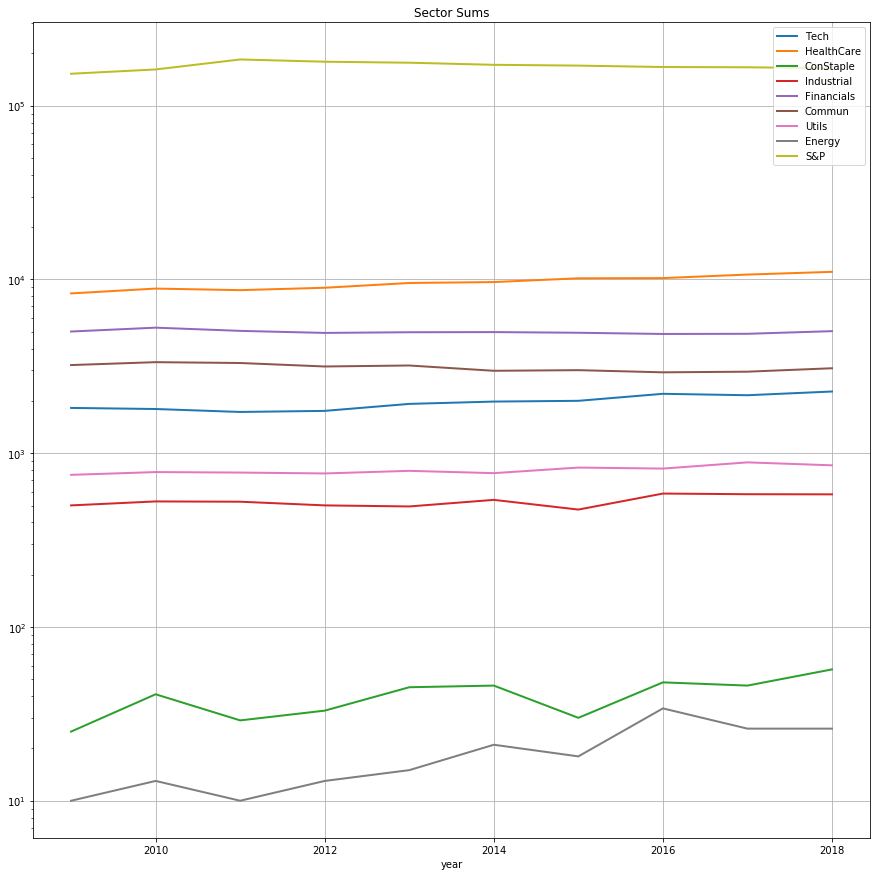

In [39]:
ax1 = dfH_SectSums.plot(title = 'Sector Sums', logy = True,grid = True, linewidth = 2)
UpdateLegend(ax1)

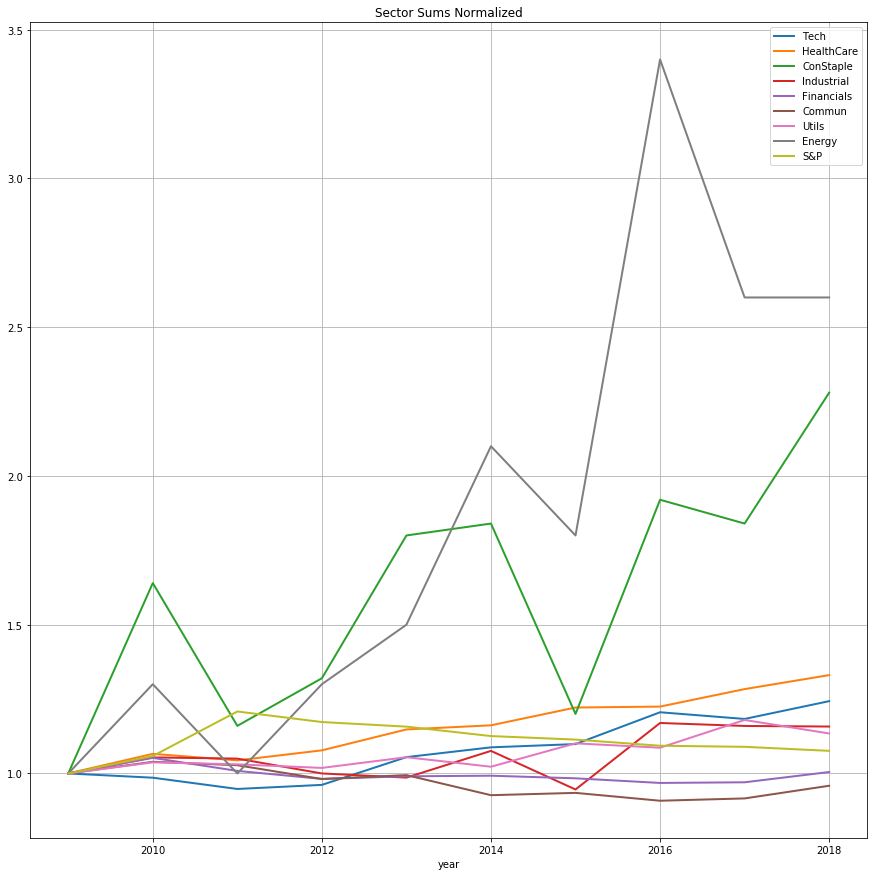

In [40]:
ax2 = dfH_SectSums_Norm.plot(title='Sector Sums Normalized',grid = True, linewidth = 2)
UpdateLegend(ax2)

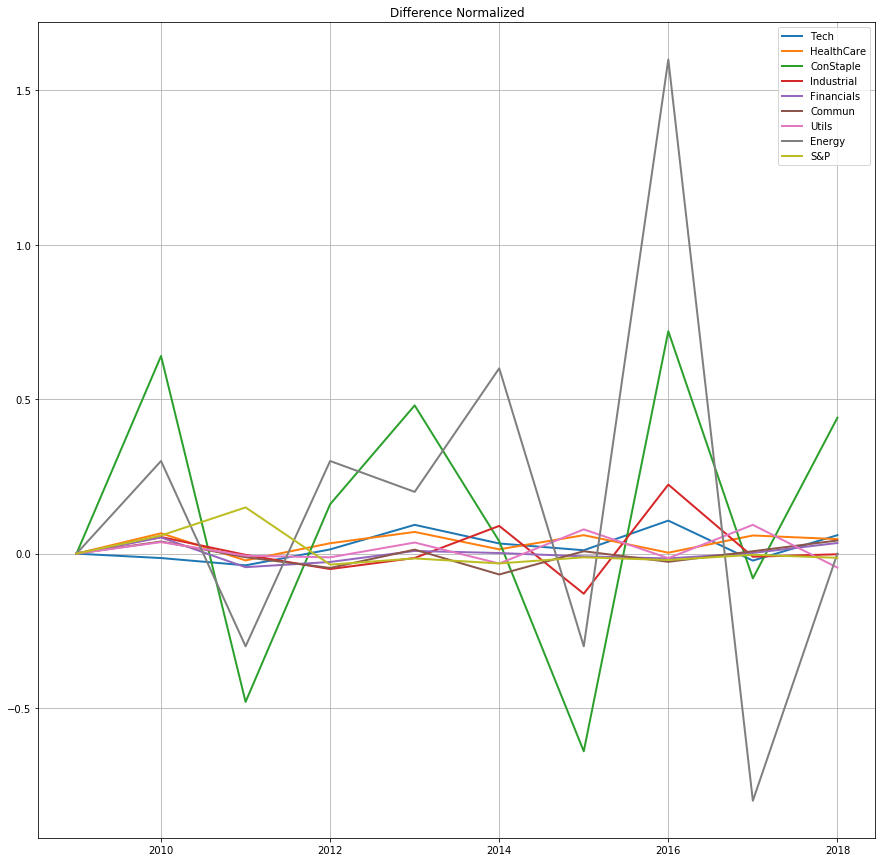

In [41]:
ax3 = dfH_SectSums_diff.plot(title = 'Difference Normalized', grid = True, linewidth = 2)
UpdateLegend(ax3)

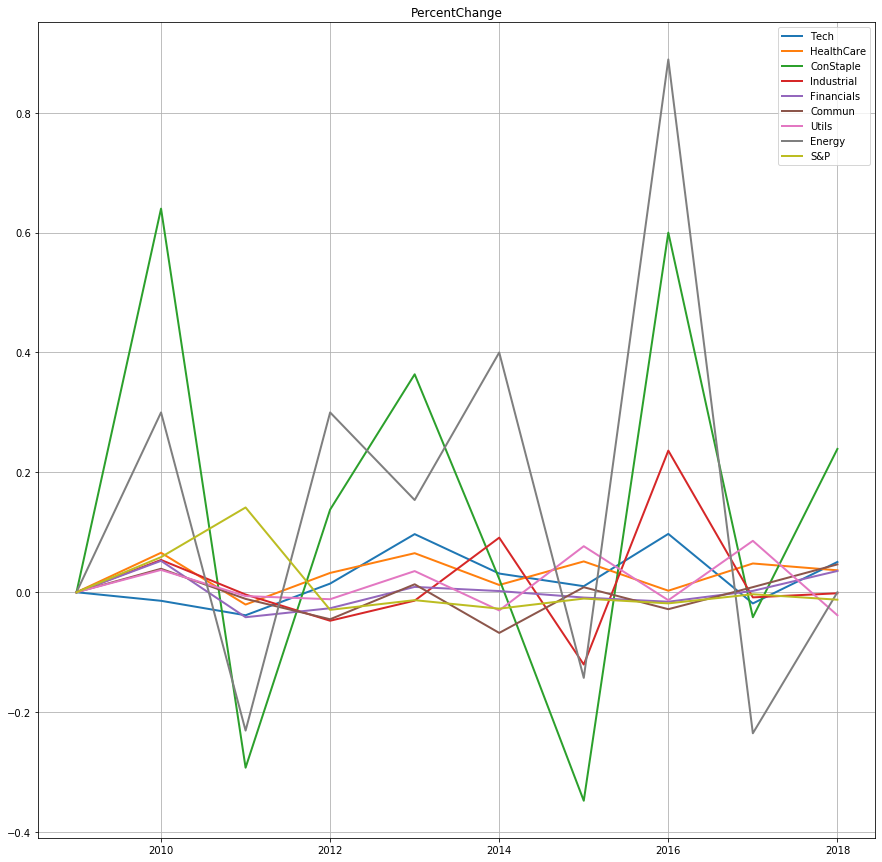

In [42]:
ax4 = dfH_SectSums_PerCh.plot(title='PercentChange',grid = True, linewidth = 2)
UpdateLegend(ax4)

#### So far we have successfully extracted the stock price data for various sectors and college enrollments in those sectors. We have also calculated the statistics of both the datasets and visualised the same in the above cells. Now we check for correlation between these two sets of data. Initially we started checking the correlation by fitting the basic linear regression model into our datasets. We also wanted to see the Neural Network's performance for the same. hence, we have used MLP Regressor. 

In [43]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 25)
pd.options.display.max_rows = 200

In [44]:
def GetSectors(df):
    L = [Sectors[col] for col in df.columns]
    return L

In [45]:
def GroupData(degreeSectors, dfDegrees):
    
    dict_Dfgroups = {}
    Leftout = set()
    for key, values in degreeSectors.items():
        try:
            dict_Dfgroups[key] = dfDegrees.loc[:,values]
        except:
              missing = set(values).difference(set(dfDegrees.columns))
              print(f'These degree codes are missing in {key}: {missing}')
              dict_Dfgroups[key] = dfDegrees.loc[:,set(values).intersection(dfDegrees.columns)]
     
    df_Hier = pd.concat(dict_Dfgroups, axis = 1, names = ['Sectors', 'Degrees'])
    df_Hier.index = dfDegrees['year']        
    return df_Hier

In [46]:
#converts E_Growth numericals to integer category
def Categorize(x):
    return 3 if x >= 2 else 2 if x >= 1.25 else 1 if x >= 1 else -1
    
#creates a new column in the dataframe categorizing enrollment growth
def GetCategory(df):
    for key in Sectors.keys():
        try:
            x = df[key]['E_Growth']
            x = x.apply(Categorize)
            # pd.Categorical(x, categories = ['Neg','Low','Med','High'], ordered = True)
            df[(key,'Category')] = x.astype(int)
        except:
            print(f'Error in {key}')
    
    return df


In [47]:
     dfH_SectSums  = Pickler(None, 'dfH_SectSums','open') 
dfH_SectSums_Norm  = Pickler(None, 'dfH_SectSums_Norm','open') 
dfH_SectSums_diff  = Pickler(None, 'dfH_SectSums_diff','open') 
dfH_SectSums_PerCh = Pickler(None, 'dfH_SectSums_PerCh','open') 

Pickle Loaded
Pickle Loaded
Pickle Loaded
Pickle Loaded


In [48]:
Enrollment = {'Sum': dfH_SectSums,
              'Growth': dfH_SectSums_Norm,
              'diff': dfH_SectSums_diff,
              'PerCh': dfH_SectSums_PerCh} 
df_dict_Y2 = Pickler(None, 'df_dict_Y2', 'open')

Pickle Loaded


In [49]:
dfH_ETF2 = pd.concat(df_dict_Y2, axis = 1, names = ['Sectors','Stats']).iloc[1:,]
dfH_Enrollment = pd.concat(Enrollment, axis = 1, names = ['Stats','ETF'])
dfH_Enrollment = dfH_Enrollment.rename(columns = {'Sum':'E_Sum', 'Growth': 'E_Growth', 'diff': 'E_diff', 'PerCh':'E_PerCh'})
dfH_Enrollment = dfH_Enrollment.reorder_levels(['ETF','Stats'],axis = 1)
dfH_Enrollment['XLK']

Stats,E_Sum,E_Growth,E_diff,E_PerCh
2009,1823,1.000000,0.000000,0.000000
2010,1797,0.985738,-0.014262,-0.014262
2011,1728,0.947888,-0.037850,-0.038397
2012,1753,0.961602,0.013714,0.014468
2013,1923,1.054855,0.093253,0.096977
2014,1983,1.087767,0.032913,0.031201
2015,2003,1.098738,0.010971,0.010086
2016,2198,1.205705,0.106967,0.097354
2017,2157,1.183214,-0.022490,-0.018653
2018,2266,1.243006,0.059792,0.050533


In [50]:
Data = pd.concat([dfH_ETF2,dfH_Enrollment],axis = 1)
Data

Sectors          XLK                                                  \
Stats   openingPrice closingPrice  priceDiff percentChange        sd   
2009       15.500000    23.129999   7.629999     49.225801  2.613763   
2010       23.139999    25.219999   2.080000      8.988764  1.275915   
2011       25.379999    25.450001   0.070002      0.275814  0.943136   
2012       25.870001    28.360001   2.490000      9.625047  1.258137   
2013       29.620001    35.509998   5.889997     19.885204  1.649374   
2014       35.619999    41.810001   6.190002     17.377885  2.161546   
2015       41.610001    43.439999   1.829998      4.397976  1.321478   
2016       42.060001    48.360001   6.299999     14.978600  2.759336   
2017       48.669998    63.950001  15.280003     31.395116  4.314359   
2018       64.209999    61.400002  -2.809998     -4.376262  3.551109   

Sectors                    XLP                                                 \
Stats      growth openingPrice closingPrice priceDiff percentChange        sd   
2009     0.867917    23.940001    26.730000  2.789999     11.654131  1.999839   
2010     0.946341    26.450001    29.299999  2.849998     10.775041  0.962106   
2011     0.954972    29.430000    32.490002  3.060001     10.397558  0.980185   
2012     1.064165    32.689999    34.450001  1.760002      5.383916  1.219555   
2013     1.332458    35.400002    42.950001  7.549999     21.327681  1.916752   
2014     1.568856    42.849998    49.090000  6.240002     14.562432  2.118695   
2015     1.630019    48.619999    51.060001  2.440002      5.018516  1.024591   
2016     1.814634    49.830002    51.709999  1.879997      3.772822  1.689400   
2017     2.399625    51.750000    56.889999  5.139999      9.932366  1.251777   
2018     2.303940    56.950001    50.570000 -6.380001    -11.202811  2.258849   

Sectors            ...       XLU    XLE       SPY       XLK       XLV  \
Stats      growth  ...    E_diff E_diff    E_diff   E_PerCh   E_PerCh   
2009     0.936908  ...  0.000000    0.0  0.000000  0.000000  0.000000   
2010     1.026989  ...  0.037284    0.3  0.058587 -0.014262  0.065897   
2011     1.138801  ... -0.006658   -0.3  0.149727 -0.038397 -0.020532   
2012     1.207501  ... -0.011984    0.3 -0.035485  0.014468  0.032251   
2013     1.505433  ...  0.035952    0.2 -0.015465  0.096977  0.065164   
2014     1.720645  ... -0.031957    0.6 -0.031676  0.031201  0.012152   
2015     1.789695  ...  0.078562   -0.3 -0.011872  0.010086  0.051439   
2016     1.812478  ... -0.014647    1.6 -0.020655  0.097354  0.002559   
2017     1.994041  ...  0.093209   -0.8 -0.003632 -0.018653  0.048012   
2018     1.772520  ... -0.045273    0.0 -0.013528  0.050533  0.036631   

Sectors       XLP       XLI       XLF       XLC       XLU       XLE       SPY  
Stats     E_PerCh   E_PerCh   E_PerCh   E_PerCh   E_PerCh   E_PerCh   E_PerCh  
2009     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2010     0.640000  0.053892  0.052411  0.039167  0.037284  0.300000  0.058587  
2011    -0.292683 -0.003788 -0.041659 -0.011068 -0.006418 -0.230769  0.141440  
2012     0.137931 -0.047529 -0.026675 -0.045070 -0.011628  0.300000 -0.029367  
2013     0.363636 -0.013972  0.008932  0.013304  0.035294  0.153846 -0.013186  
2014     0.022222  0.091093  0.002012 -0.067834 -0.030303  0.400000 -0.027369  
2015    -0.347826 -0.120594 -0.008835  0.008384  0.076823 -0.142857 -0.010546  
2016     0.600000  0.236287 -0.015802 -0.028267 -0.013301  0.888889 -0.018544  
2017    -0.041667 -0.008532  0.002264  0.008556  0.085784 -0.235294 -0.003323  
2018     0.239130 -0.001721  0.035531  0.046488 -0.038375  0.000000 -0.012416  

[10 rows x 108 columns]

In [51]:
Data = GetCategory(Data)
Pickler(Data,'Data_full','save')
Data = Pickler(None,'Data_full','open')

Error in XLRE
Error in XLY
Error in XLB
Pickle Saved
Pickle Loaded


In [52]:
def Corr(DF,sect):
    
    df = DF[sect]

    #ax2 = plt.imshow(df.corr(),cmap = 'tab20c_r',aspect = 'auto',vmin = -1, vmax = 1)
    ax2 = plt.matshow(df.corr(),cmap = 'tab20c_r',vmin = -1, vmax = 1, fignum = sect)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=90)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
    plt.grid(which = 'both',color = 'black',linewidth = 0.45,linestyle = '--')
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=10)

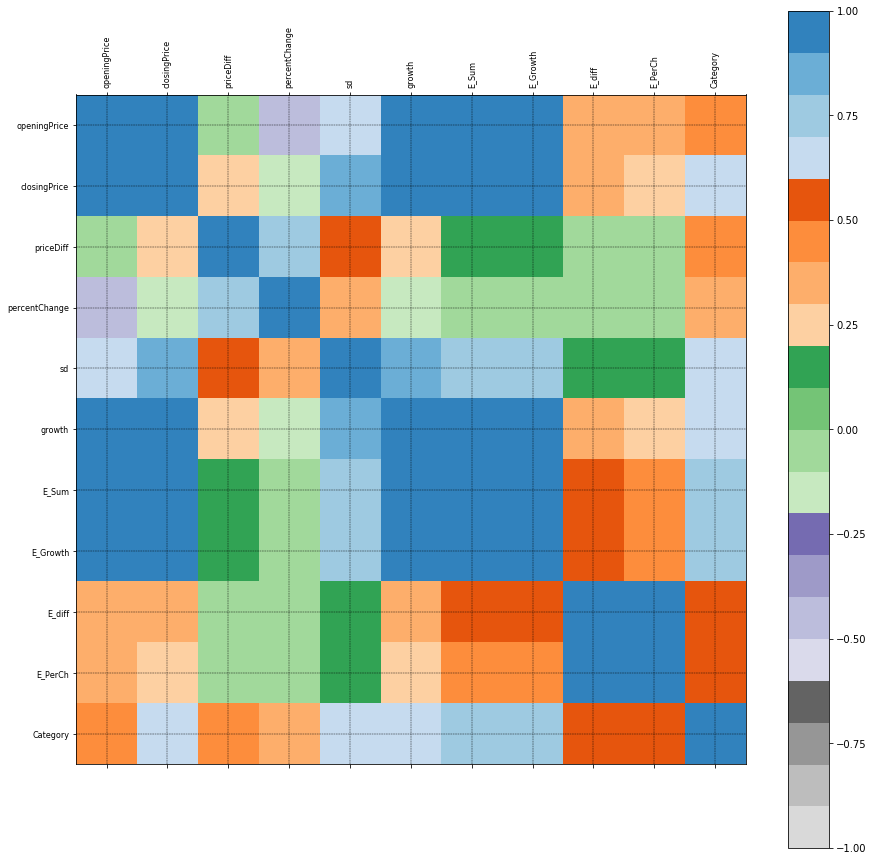

In [53]:
#----------------------------------Correlation Plots for Each Sector
Corr(Data,'XLK')

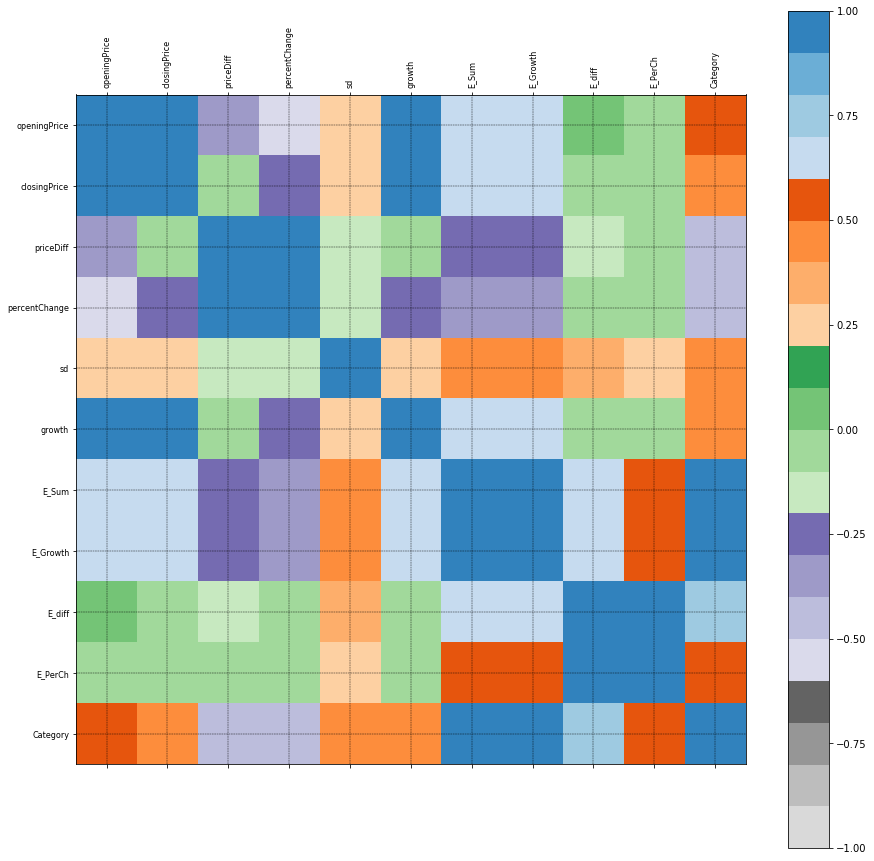

In [54]:
Corr(Data,'XLP')

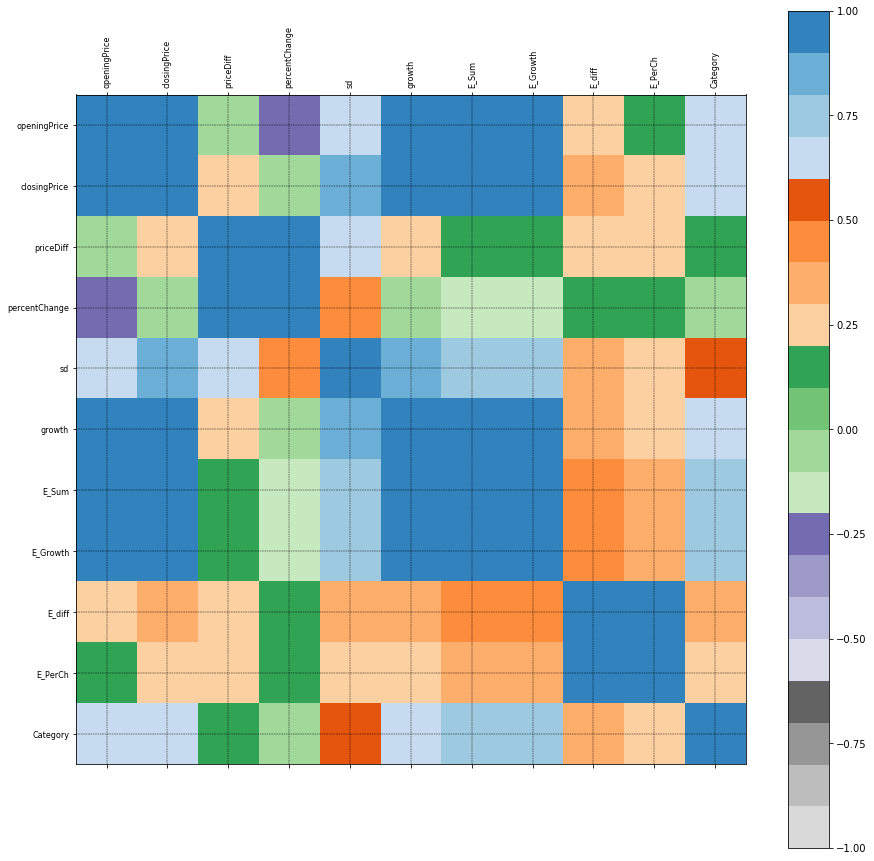

In [55]:
Corr(Data,'XLV')

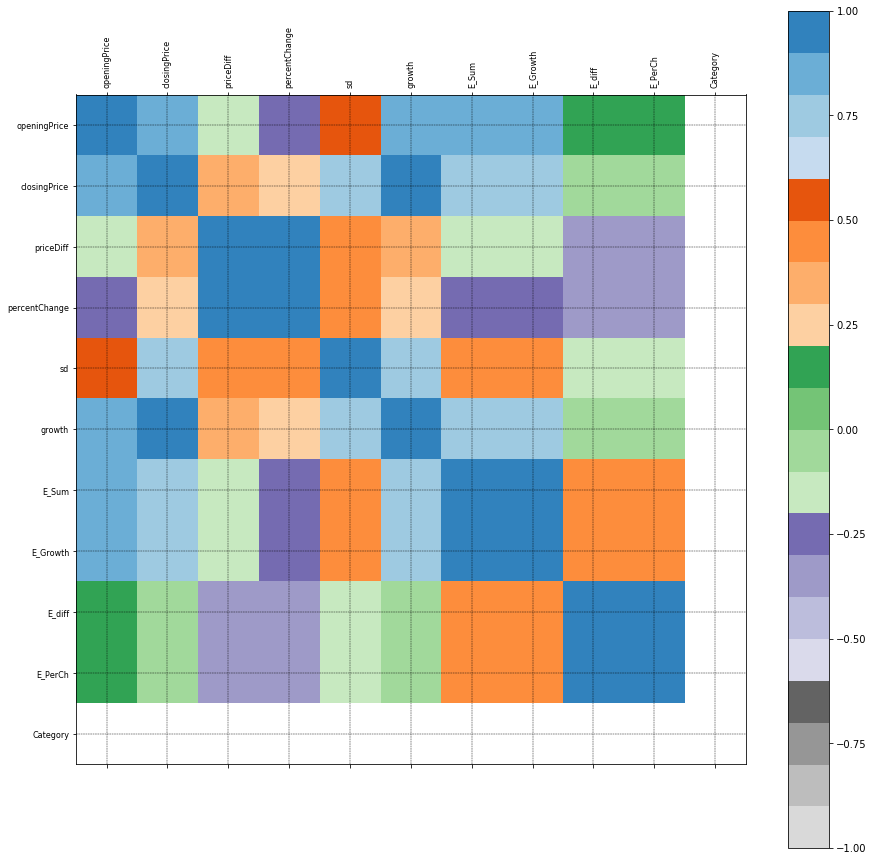

In [56]:
Corr(Data,'XLU')

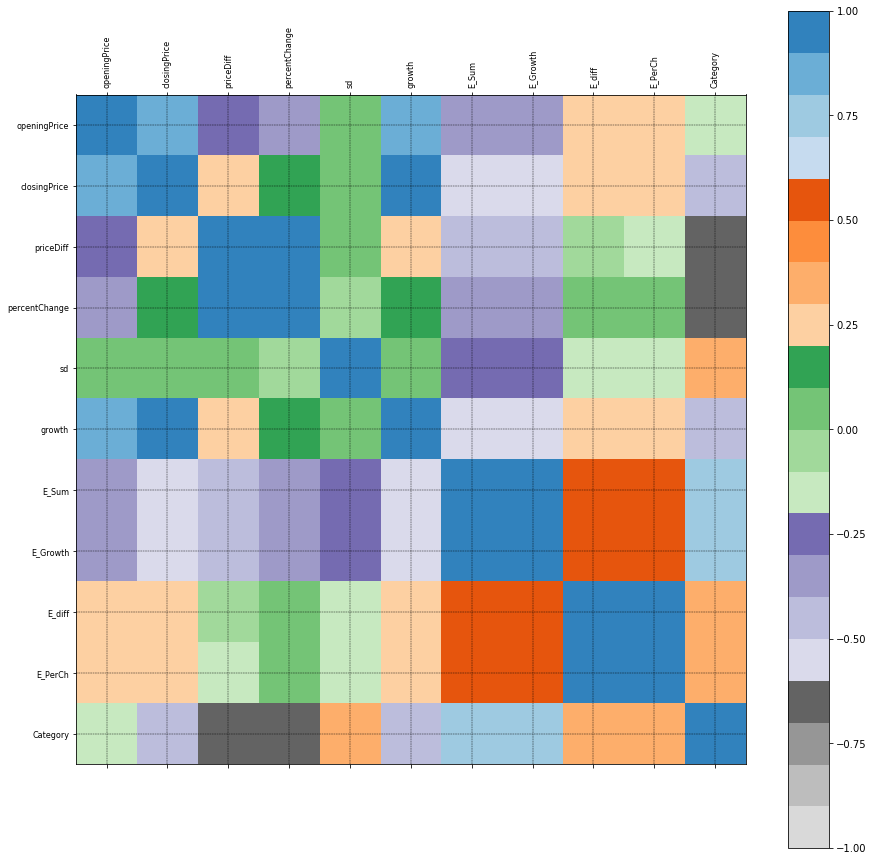

In [57]:
Corr(Data,'XLF')

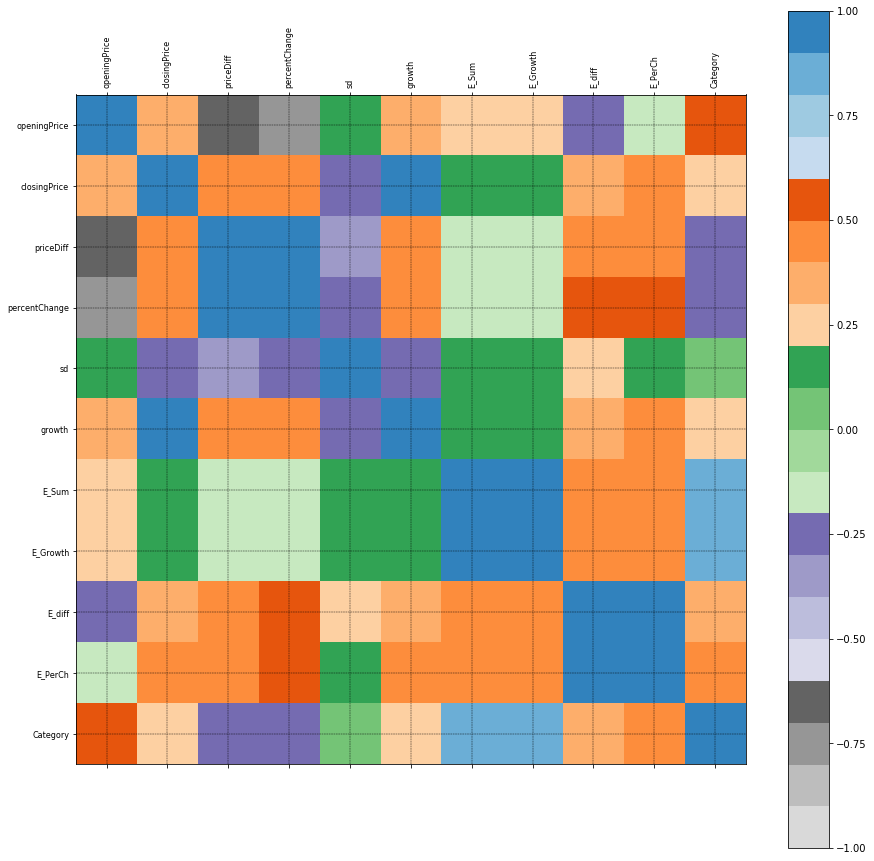

In [58]:
Corr(Data,'XLE')

In [ ]:
#We couldn't use all the ETFs because there were not enough enrollment data or stock history
#Corr(Data,'XLC')
#Corr(Data,'XLY')
#Corr(Data,'XLB')
#Corr(Data,'SPY')
#if you would like to see the correlation between them, you can uncomment and check

In [59]:
Sectors = {  'XLK': 'Tech',
             'XLP': 'ConStaple',
             'XLV': 'HealthCare',
             'XLU': 'Utils',
             'XLI': 'Industrial',
             'XLF': 'Financials',
             'XLE': 'Energy'}
colors = {-1:'red',1:'orange',2:'green',3:'blue'}

In [ ]:
#fig, axes = plt.subplots(nrows = 4, ncols = 7, num = 'test')
#fig, axes = plt.subplots(nrows = 3, ncols = 5)
#axes = axes.flatten()
#axes[0].set_visible(False)

In [60]:
Data['XLK']['Category'].apply(lambda Cat: colors[Cat])
pd.Series(Data['XLK']['Category'].unique()).apply(lambda Cat: colors[Cat])

0    orange
1       red
dtype: object

In [62]:

def PlotVS(Data,size):
    
    fig, axes = plt.subplots(nrows = 3, ncols = 5)
    axes = axes.flatten()
    for Num, sector in enumerate(Sectors.keys()):
        count = 0
        for i, x in enumerate(Data[sector].iloc[:,0:6]):
            for j, y in enumerate(Data[sector].iloc[:,0:6]):
                if i >= j:
                    continue
                else:    
                    ax = axes[count]
                    ax.scatter(Data[sector][x],Data[sector][y],
                               c = Data[sector]['Category'].apply(lambda Cat: colors[Cat]), s = size,
                               label = 'Category')#,
                               #label = pd.Series(Data[sector]['Category'].unique()).apply(lambda Cat: colors[Cat]))
                    
                    if Num == 0:
                        ax.set_xlabel(x)
                        ax.set_ylabel(y)
                    
                    count += 1
    red_patch = mpatches.Patch(color = 'red', label = 'Neg', capstyle = 'round')
    org_patch = mpatches.Patch(color = 'orange', label = 'Low', capstyle = 'round')
    grn_patch = mpatches.Patch(color = 'green', label = 'Mid', capstyle = 'round')
    blu_patch = mpatches.Patch(color = 'blue', label = 'High', capstyle = 'round') 
                   
    for ax in axes:
        ax.legend(handles = [red_patch,org_patch,grn_patch, blu_patch], prop = {'size':6})
                

    fig.suptitle('Enrollment Growth')
    


In [65]:
#----------------------------Next Chart is Large, Plot Chart in seperate window
%matplotlib qt5

In [68]:
#--------------------------Enrollment Growth by ETF Pairwise data
PlotVS(Data,10) 

In [69]:
#------------------------Reduce the Number of Sectors/Categories in the data

sectors = ['XLK', 'XLP', 'XLV', 'XLU', 'XLC', 'XLRE', 'XLY', 'XLB', 'XLI','XLF', 'XLE', 'SPY']
sectors_r  = ['XLK','XLP','XLV','XLU','XLI','XLF','XLE']
Data_red = Data.loc[:,['XLK','XLP','XLV','XLU','XLI','XLF','XLE']]
Data_red


Xvals = Data_red.iloc[:,[col not in ['E_Sum','E_Growth','E_diff','E_PerCh','Category'] for col in Data_red.columns.get_level_values(1)]]
Yvals = Data_red.iloc[:,[col in ['E_Sum','E_Growth','E_diff','E_PerCh','Category'] for col in Data_red.columns.get_level_values(1)]]

Xvals = Xvals.interpolate(method = 'linear',axis = 1)
Xvals

#PlotVS(Data_red,3)

In [70]:
#Scale
Xvals_s = StandardScaler().fit_transform(Xvals) 
np.mean(Xvals_s) #mean ~0
np.std(Xvals_s)  #std 1

1.0

In [71]:
temp = {}
for col, val in zip(Xvals.columns, Xvals_s.T):
    temp[col] = pd.Series(val)

Xvals_s = pd.concat(temp, axis = 1, names = ['Sectors','Stats'])
Xvals_s.index = Xvals.index
Xvals_s   #Scaled Values

Sectors          XLK                                                           \
Stats   openingPrice closingPrice priceDiff percentChange        sd    growth   
2009       -1.442327    -1.173225  0.662213      2.275422  0.405771 -1.173225   
2010       -0.882058    -1.024913 -0.510126     -0.413580 -0.859791 -1.024913   
2011       -0.717790    -1.008592 -0.934702     -0.995858 -1.174590 -1.008592   
2012       -0.681857    -0.802090 -0.423521     -0.371058 -0.876608 -0.802090   
2013       -0.406855    -0.294708  0.294668      0.314618 -0.506510 -0.294708   
2014        0.033147     0.152357  0.358039      0.147057 -0.022012  0.152357   
2015        0.472416     0.268026 -0.562934     -0.720378 -0.816690  0.268026   
2016        0.505416     0.617162  0.381274     -0.013285  0.543479  0.617162   
2017        0.990151     1.723469  2.278139      1.083815  2.014481  1.723469   
2018        2.129757     1.542515 -1.543050     -1.306752  1.292471  1.542515   

Sectors          XLP                                                           \
Stats   openingPrice closingPrice priceDiff percentChange        sd    growth   
2009       -1.428174    -1.532708  0.016043      0.432025  0.948936 -1.532708   
2010       -1.202023    -1.283306  0.032931      0.323264 -1.202734 -1.283306   
2011       -0.933525    -0.973736  0.092039      0.276562 -1.165248 -0.973736   
2012       -0.639800    -0.783531 -0.273864     -0.343724 -0.668930 -0.783531   
2013       -0.395629     0.041341  1.355815      1.628832  0.776659  0.041341   
2014        0.275616     0.637189  0.987097      0.791838  1.195375  0.637189   
2015        0.795492     0.828365 -0.082468     -0.388931 -1.073175  0.828365   
2016        0.904513     0.891443 -0.240090     -0.543048  0.305262  0.891443   
2017        1.077505     1.394130  0.677485      0.219009 -0.602120  1.394130   
2018        1.546025     0.780814 -2.564987     -2.395827  1.485975  0.780814   

Sectors  ...          XLF                                                 \
Stats    ... openingPrice closingPrice priceDiff percentChange        sd   
2009     ...    -1.174020    -1.141516  0.102298      0.370737  1.805949   
2010     ...    -0.887929    -0.922239 -0.037897      0.026957 -1.133384   
2011     ...    -0.650717    -1.350560 -1.348291     -1.821224  0.549728   
2012     ...    -1.066197    -0.885693  0.388410      0.791487 -1.126466   
2013     ...    -0.560146    -0.071444  0.974940      1.272333 -0.136800   
2014     ...     0.161552     0.405118  0.471383      0.336441 -0.775558   
2015     ...     0.598597     0.267704 -0.667344     -0.785609 -1.234207   
2016     ...     0.380075     0.932954  1.069572      0.841165  1.155345   
2017     ...     1.202970     1.771537  1.073163      0.562964  0.490750   
2018     ...     1.995814     0.994139 -2.026234     -1.595251  0.404642   

Sectors                    XLE                                                 \
Stats      growth openingPrice closingPrice priceDiff percentChange        sd   
2009    -1.141516    -1.962724    -1.309755  0.787822      1.016070  0.221347   
2010    -0.922239    -1.063555    -0.162995  0.871680      0.922444 -0.580865   
2011    -1.350560    -0.047826    -0.057768 -0.001835     -0.110886  0.341836   
2012    -0.885693     0.109436     0.017395 -0.089186     -0.195829 -1.337615   
2013    -0.071444     0.326827     1.931884  1.263015      1.071655 -0.915882   
2014     0.405118     1.717211     1.083624 -0.739954     -0.687935  1.320485   
2015     0.267704     0.861519    -1.032729 -1.653650     -1.545658  1.580278   
2016     0.932954    -0.856339     0.606881  1.302322      1.371899  0.731582   
2017     1.771537     0.619150     0.278315 -0.358228     -0.432438 -1.444173   
2018     0.994139     0.296301    -1.354853 -1.381987     -1.409322  0.083008   

Sectors            
Stats      growth  
2009    -1.309755  
2010    -0.162995  
2011    -0.057768  
2012     0.017395  
2013     1.931884  
2014     1.083624  
2015    

In [72]:
X_train, X_test, y_train, y_test = train_test_split(Xvals_s,Yvals, 
                                                    test_size = .30,shuffle = False, random_state = 1)

In [73]:
#fitting the linear regression model to the data
Models_LR = {}
for sector in sectors_r:
    Models_LR[sector] = {}
    for target in y_train[sector].columns:
        Models_LR[sector][target] = {}
        Model_LR_sector = LinearRegression()
        Model_LR_sector.fit(X_train[sector],y_train[sector][target])
        y_pred = Model_LR_sector.predict(X_test[sector])
        r2 = metrics.r2_score(y_test[sector][target], y_pred)
        
        Models_LR[sector][target]['Model'] = Model_LR_sector
        Models_LR[sector][target]['r2'] = r2
        if r2 > 0:
            print(f'\033[1m Sector {sector} & Target {target} r2 value: {r2}\033[0m')
        else:
            print(f'Sector {sector} & Target {target} r2 value: {r2}')


#Models_LR

Sector XLK & Target E_Sum r2 value: -4.915899132425313
Sector XLK & Target E_Growth r2 value: -4.9158991324253165
Sector XLK & Target E_diff r2 value: -36.13097874528066
Sector XLK & Target E_PerCh r2 value: -49.20538405752433
Sector XLK & Target Category r2 value: 0.0
Sector XLP & Target E_Sum r2 value: -175.72928217070339
Sector XLP & Target E_Growth r2 value: -175.7292821707037
Sector XLP & Target E_diff r2 value: -49.39244622082771
Sector XLP & Target E_PerCh r2 value: -36.097515441397654
Sector XLP & Target Category r2 value: -92.34117307002856
Sector XLV & Target E_Sum r2 value: -2.942449076714328
Sector XLV & Target E_Growth r2 value: -2.9424490767142957
Sector XLV & Target E_diff r2 value: -1.3830209751255649
Sector XLV & Target E_PerCh r2 value: -1.635522317748484
Sector XLV & Target Category r2 value: -2.0
Sector XLU & Target E_Sum r2 value: -3.102926177184612
Sector XLU & Target E_Growth r2 value: -3.1029261771846075
Sector XLU & Target E_diff r2 value: -0.53616538898026
Sec

In [89]:
#fitting 
Models_NN = {}
for sector in sectors_r:
    Models_NN[sector] = {}
    print(f'-----------------sector: {sector}------Pecent Complete: {str(100*sectors_r.index(sector)/len(sectors_r))[0:6]}%---------------')
    for target in y_train[sector].columns:
        Models_NN[sector][target] = {}
        Model_NN_sector = MLPRegressor(hidden_layer_sizes = (7,7*8,7*8,7*8,7*8,7*8,7*8,7*8,7*8,7*8), 
                                       activation = 'relu',
                                       solver = 'adam', alpha = 0.001,learning_rate = 'adaptive',
                                       max_iter = 10000, random_state = 12)
        
        
        Model_NN_sector.fit(X_train[sector],y_train[sector][target])
        y_pred = Model_NN_sector.predict(X_test[sector])
        r2 = metrics.r2_score(y_test[sector][target], y_pred)
        
        Models_NN[sector][target]['Model'] = Model_NN_sector
        Models_NN[sector][target]['r2'] = r2
        if r2 > 0 :
            print(f'\033[1m Sector {sector} & Target {target} r2 value: {r2}\033[0m')  
        else:
            print(f'Sector {sector} & Target {target} r2 value: {r2}')  
    print('\n')
    
print('Completed: 100%')    

-----------------sector: XLK------Pecent Complete: 0.0%---------------
Sector XLK & Target E_Sum r2 value: -2787.6772135848923
Sector XLK & Target E_Growth r2 value: -13.021511310804073
Sector XLK & Target E_diff r2 value: -2.632460830773315
Sector XLK & Target E_PerCh r2 value: -3.85571676605233
Sector XLK & Target Category r2 value: 0.0


-----------------sector: XLP------Pecent Complete: 14.285%---------------
Sector XLP & Target E_Sum r2 value: -7.855764669620116
Sector XLP & Target E_Growth r2 value: -4.12778832122384
Sector XLP & Target E_diff r2 value: -4.995202324420933
Sector XLP & Target E_PerCh r2 value: -5.309425794349946
Sector XLP & Target Category r2 value: -0.3571339868333234


-----------------sector: XLV------Pecent Complete: 28.571%---------------
Sector XLV & Target E_Sum r2 value: -80.39557008281736
 Sector XLV & Target E_Growth r2 value: 0.5731666913238516
Sector XLV & Target E_diff r2 value: -1.52983874810544
Sector XLV & Target E_PerCh r2 value: -2.4756150487980

## Conclusion 

<br> From the linear regression model, we observe that for sector XLU r2 value is equal to 1</br>
<br>
<b> "Sector XLU & Target Category r2 value: 1.0" </b>
</br>
<br> From this we can say that the sector XLU's stock market performance and college enrollments in XLU sector (Nuclear Engineering and Electrical Engineering) are linearly correlated with each other.</br>
<br> E_growth and category are the same information but the category has grouped the data into 4 categories (high, medium, low, negative growth).
The linear model can't make predictions on the numerical data but it can on the categorical.</br>
<br> The rest of the categories do not show any correlation between the stock market performance and college enrollments.</br>

